# Nama  : Nur Muhammad Fadilah
# NIM   : 20220801114

# 1. Mengimpor library yang diperlukan
Pandas dan NumPy digunakan untuk manipulasi data.
Matplotlib dan Seaborn digunakan untuk membuat visualisasi (seperti confusion matrix).
Scikit-learn digunakan untuk melakukan pembagian data, melatih model (Decision Tree), dan evaluasi hasil prediksi.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.datasets import load_iris
import seaborn as sns

# 2. Memuat dataset (contoh dataset Iris)
- Dataset Iris dari Scikit-learn di-load ke dalam DataFrame menggunakan Pandas. Dataset ini memiliki 150 data dengan 4 fitur dan 3 kelas target (Setosa, Versicolor, Virginica).
- Kita menambahkan kolom target ke DataFrame untuk menyimpan label (kelas) dari setiap baris.
- lalu menampilkan 5 data pertama dari dataset untuk memastikan bahwa data sudah ter-load dengan benar.

In [2]:

iris = load_iris()
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']

# Melihat beberapa data untuk verifikasi
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


# 3. Preprocessing - Memisahkan fitur dan target
- X: Variabel fitur (data input) yang merupakan semua kolom kecuali kolom target.
- y: Variabel target (data output) yang merupakan kolom target itu sendiri.
- Data kemudian dibagi menjadi data latih dan data uji. Sebanyak 70% data digunakan untuk melatih model (train) dan 30% digunakan untuk menguji model (test). Pengacakan (random) diatur dengan ```random_state=42``` agar hasil bisa direproduksi.

In [3]:
X = df.drop(columns='target')
y = df['target']

# Membagi data menjadi data latih dan data uji (70% latih, 30% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Melatih model Decision Tree
- Decision Tree Classifier adalah algoritma yang digunakan untuk melatih model berdasarkan data latih. Decision Tree bekerja dengan membangun pohon keputusan untuk menentukan aturan klasifikasi dari data input.
- ```fit()```: Fungsi ini melatih model menggunakan data latih ```X_train``` dan target ```y_train```.

In [4]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

# 5. Prediksi dan Evaluasi Model
- Setelah model dilatih, kita gunakan model tersebut untuk memprediksi label dari data uji ```X_test``` dengan fungsi ```predict()```.`
- Lalu akurasi dihitung dengan membandingkan prediksi model ```y_pred``` dengan target asli dari data uji ```y_test```. Hasil akurasi ditampilkan dalam bentuk persentase.
- Confusion Matrix: Menunjukkan seberapa baik model memprediksi setiap kelas (benar atau salah), memperlihatkan kesalahan klasifikasi antar kelas.
- Classification Report: Menyediakan metrik evaluasi seperti precision, recall, dan f1-score untuk setiap kelas target. Ini membantu dalam memahami performa model secara mendalam.

In [5]:
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy*100:.2f}%')

# Menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Menampilkan classification report
report = classification_report(y_test, y_pred, target_names=iris['target_names'])
print("\nClassification Report:\n", report)

Akurasi: 100.00%
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# 5. Visualisasi Confusion Matrix
- Untuk membuat hasil lebih mudah dipahami, kita membuat heatmap dari confusion matrix menggunakan Seaborn. Ini memberi visualisasi yang intuitif tentang bagaimana model melakukan prediksi untuk setiap kelas target.
- Axis Label: Sumbu ```x``` adalah label yang diprediksi, dan sumbu ```y``` adalah label asli.

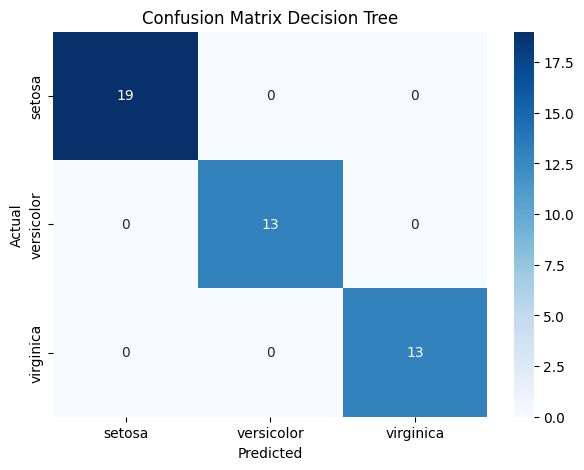

In [6]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris['target_names'], yticklabels=iris['target_names'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision Tree')
plt.show()